<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [79]:
import numpy as np

def calculate(values, ddof=1): #STRETCH GOAL. Pretty sure it was okay to use some functions here, such as np.mean, but decided to do each part by hand to reinforce the concepts.
    total = 0
    for i in values: #calculate mean
        total += i
    mean = total / len(values)

    total = 0
    for i in values: #calculate mean/STD
        total += (i - mean)**2
    variance = total / (len(values) - ddof) #n - 1 for sample variance, n for population variance.
    std = np.sqrt(variance) #no idea how to write this manually(the sqrt function)

    method = "Population" if ddof == 0 else "Sample" #use of conditional expressions, more commonly known as a ternary operator in other languages.
    
    return mean, variance, std, method


sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
mean, variance, std, method = calculate(sales, 1)

print("Mean: " + str(mean))
print(method + " Variance: " + str(variance))
print(method + " Standard Deviation: " + str(std))

Mean: 3052.714285714286
Sample Variance: 214387.90476190473
Sample Standard Deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [80]:
import pandas as pd

customers = np.array([127, 80, 105, 92, 120, 115, 93])

covariance = np.cov(customers, sales)[1][0]
covariance


7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [81]:
_, _, std_sales, _ = calculate(sales, ddof=1)
_, _, std_customers, _ = calculate(customers, ddof=1)
std_customers

17.057326313123664

In [82]:
corr_coef = covariance / (std_sales*std_customers)
corr_coef

0.9628339778148909

In [83]:
np.corrcoef(sales, customers) #to check work

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [86]:
df.cov() #variance-covariance matrix

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [87]:
df.corr() #correlation matrix

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

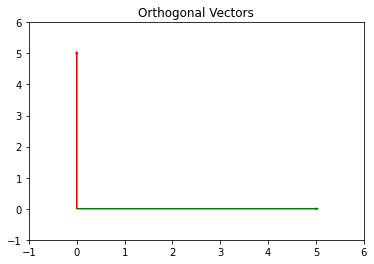

In [88]:
import matplotlib.pyplot as plt

vector_1 = [0, 5]
vector_2 = [5, 0]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()



Orthogonality would also mean that perpendicularity.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

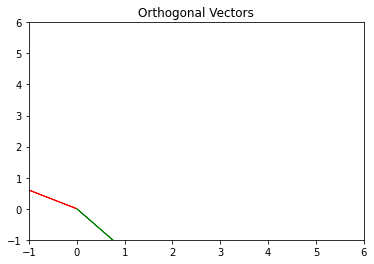

In [89]:
vector_1 = [-5, 3, 7]
vector_2 = [6, -8, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()

They are not orthogonal because they are not perpendicular.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [90]:
c = np.array([2, -15, 6, 20])


print('Dot product of C dot C is: ' + str(np.dot(c, c)))
print('C transpose multiplied by C is: ' + str(np.matmul(c.T, c)))
print('Norm of C to the second power is: ' + str(np.linalg.norm(c)**2))


Dot product of C dot C is: 665
C transpose multiplied by C is: 665
Norm of C to the second power is: 665.0


All results equal 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat(k)
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [91]:
f = np.array([4, 12, 11, 9, 2])

norm = np.linalg.norm(f)

f = f / norm
f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

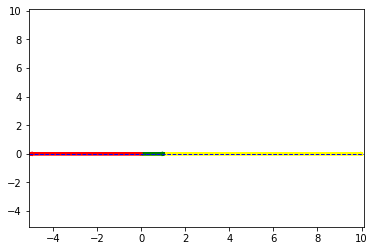

In [92]:
plt.xlim(-5.1,10.1)          
plt.ylim(-5.1,10.1)

v = [1,0] 

v2 = np.multiply(10, v)
v3 = np.multiply(-5,v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

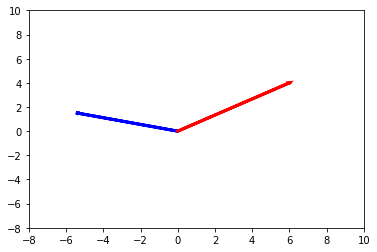

In [93]:
plt.xlim(-8,10)          
plt.ylim(-8,10)

a = [-5.4,1.5] 
b = [6, 4]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

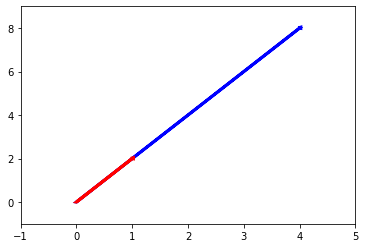

In [94]:
g = [1, 2]
h = [4, 8]

plt.arrow(0, 0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.xlim((-1,5))
plt.ylim((-1,9))
plt.show()


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [95]:
a = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(a)

3

Because we get a result of 3, the three vextors span 3 dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


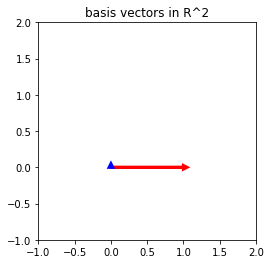

In [96]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,0]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

After removing redundant vectors, it is a set of independant vectors that span a vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [97]:
rank = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(rank)

3

## 7.2 What does the rank of a matrix tell us?

It tells us the maximum number of row vectors in a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

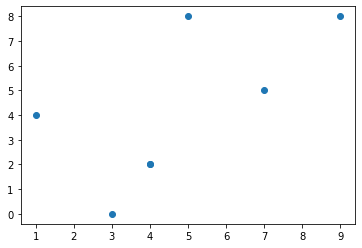

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()